## Data Analysis on MAANG companies stock data

Visualizations using **Seaborn**

Preprocessed data: data/processed/maang_combined.csv

original data by SOUMENDRA PRASAD MOHANTY

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
# import data
data = pd.read_csv('data/processed/maang_combined.csv')
data.head(3)

,Open,High,Low,Close,Adj Close,Volume,Date,Company
0,4.07500,4.478125,3.952344,4.468750,4.468750,322352000,2000-01-03,Amazon
1,4.26875,4.575000,4.087500,4.096875,4.096875,349748000,2000-01-04,Amazon
2,3.52500,3.756250,3.400000,3.487500,3.487500,769148000,2000-01-05,Amazon


In [11]:
# example of separated dataframe
aapl_df = data[data["Company"] == "Apple"]
aapl_df.head(3)

,Open,High,Low,Close,Adj Close,Volume,Date,Company
5839,0.936384,1.004464,0.907924,0.999442,0.850643,535796800,2000-01-03,Apple
5840,0.966518,0.987723,0.903460,0.915179,0.778926,512377600,2000-01-04,Apple
5841,0.926339,0.987165,0.919643,0.928571,0.790324,778321600,2000-01-05,Apple


In [12]:
# check for missing values
data.isna().any().any()

np.False_

### Closing prices

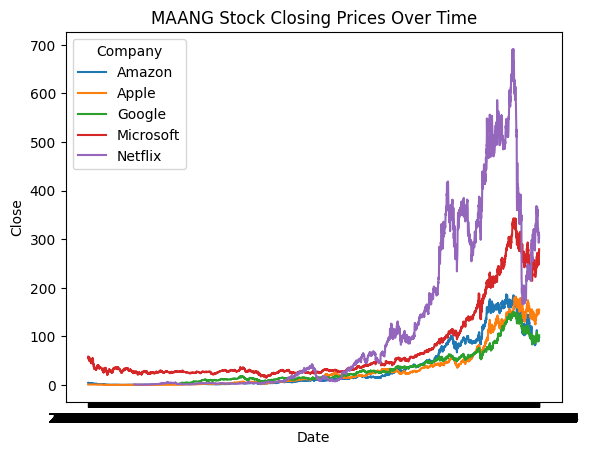

In [13]:
# simple line plot
sns.lineplot(data=data, x="Date", y="Close", hue="Company")
plt.title("MAANG Stock Closing Prices Over Time")
plt.show()

In [14]:
# company stock close price correlation matrix
pivoted_data = data.pivot(index="Date", columns="Company", values="Close")
pivoted_data.corr()

Company,Amazon,Apple,Google,Microsoft,Netflix
Company,,,,,
Amazon,1.000000,0.939152,0.955467,0.956184,0.970675
Apple,0.939152,1.000000,0.971538,0.981584,0.860492
Google,0.955467,0.971538,1.000000,0.979167,0.900185
Microsoft,0.956184,0.981584,0.979167,1.000000,0.897867
Netflix,0.970675,0.860492,0.900185,0.897867,1.000000


In [15]:
# average closing price per company
data.groupby("Company")["Close"].mean()

Company
Amazon        34.853440
Apple         30.982545
Google        38.265822
Microsoft     70.482805
Netflix      122.090193
Name: Close, dtype: float64

### Volume